# **Proceso Poisson**

## **Definición 1**

Sean $T_1$, $T_2$, ..., $T_n$ v.a.i.i.d con distribución exponencial de parámetro $\lambda$, : $\mathcal{E}xp(\lambda)$. : $\mathcal{W}_0=0$, $\mathcal{W}_n=T_1, T_2, ..., T_n$ para $n\geq 1$. Definimos el proceso Poisson de parámetro o intensidad $\lambda$ por

\begin{equation}
N(t)  =  máx \{n\geq 1, \  \ \mathcal{W}_n = T_1 + T_2 + ...+ T_n \leq t\}
\end{equation}

Las variables aleatorias $T_n$ representan los intervalos de tiempo entre eventos sucesivos, y $\mathcal{W}_n = T_1, T_2, ..., T_n$ representa el instante en el que ocurre el n-ésimo evento, y $N(t)$ es el número de eventos que han ocurrido hasta el instante t.

## **Proposición:**

La variable aleatoria $N(t)$ tiene distribución Poisson con parámetro $(\lambda t)$, es decir, para cualquier $t>0$, y para $n=0, 1, ...$ 

\begin{equation}
P(N(t) = n) =  e^{-\lambda t} \frac{(\lambda t)^n}{n!}
\end{equation}

Su valor esperado, y varianza son

$$E(N(t)) = \lambda t $$

$$Var(N(t)) = \lambda t $$

# **Simulación:**

In [3]:
library('dplyr')
library('tidyr')
library('ggplot2')

In [4]:
# Función para simular una trajectoria del proceso Poisson homogéneo
sim.one.PoissonProcess <- function(run, tmax, lambda){
  w <- c()
  w[1] <- 0
  i <- 2
  while(w[i-1] < tmax){
    #i <- i + 1
    Ti <- rexp(1, lambda)
    #print(Ti)
    if(w[i-1] +  Ti < tmax){
      w[i] <- w[i-1] +  Ti
    }else{
      break
    }
    i <- i + 1
  } 
  df <- data.frame('runs' = rep(run, length(w)),  
                   'n' = 0:(length(w)-1),
                   't' = w)
  return(df)
}

# Función para simular n trajectorias del proceso Poisson homogéneo
sim.PoissonProcess <- function(n.runs, tmax, lambda){
  for(i in 1:n.runs){
    if(i == 1){
      df_1 <- sim.one.PoissonProcess(run=i, tmax, lambda)
    }else{
      df_i <- sim.one.PoissonProcess(run=i, tmax, lambda)
      df_1 <- rbind(df_1, df_i)
    }
    
  }
  return(df_1)
}

In [25]:
# Example :
n.runs <- 8000 # número de trajectorias del proceso
tmax <- 500   # t máximo
lambda <- 0.2

# Simulación
sim.PP <- sim.PoissonProcess(n.runs, tmax, lambda)

# Media y varianza teóricas
moments_pp <- data.frame('t'=c(0:tmax),'lambda'=lambda) %>%
  mutate('mean' = t*lambda,
          'sd_inf' = mean - 2*sqrt(t*lambda),
          'sd_sup' = mean + 2*sqrt(t*lambda)) 
head(sim.PP)

,runs,n,t
,<int>,<int>,<dbl>
1,1,0,0.000000
2,1,1,1.236169
3,1,2,11.336709
4,1,3,13.004446
5,1,4,16.360096
6,1,5,22.602846


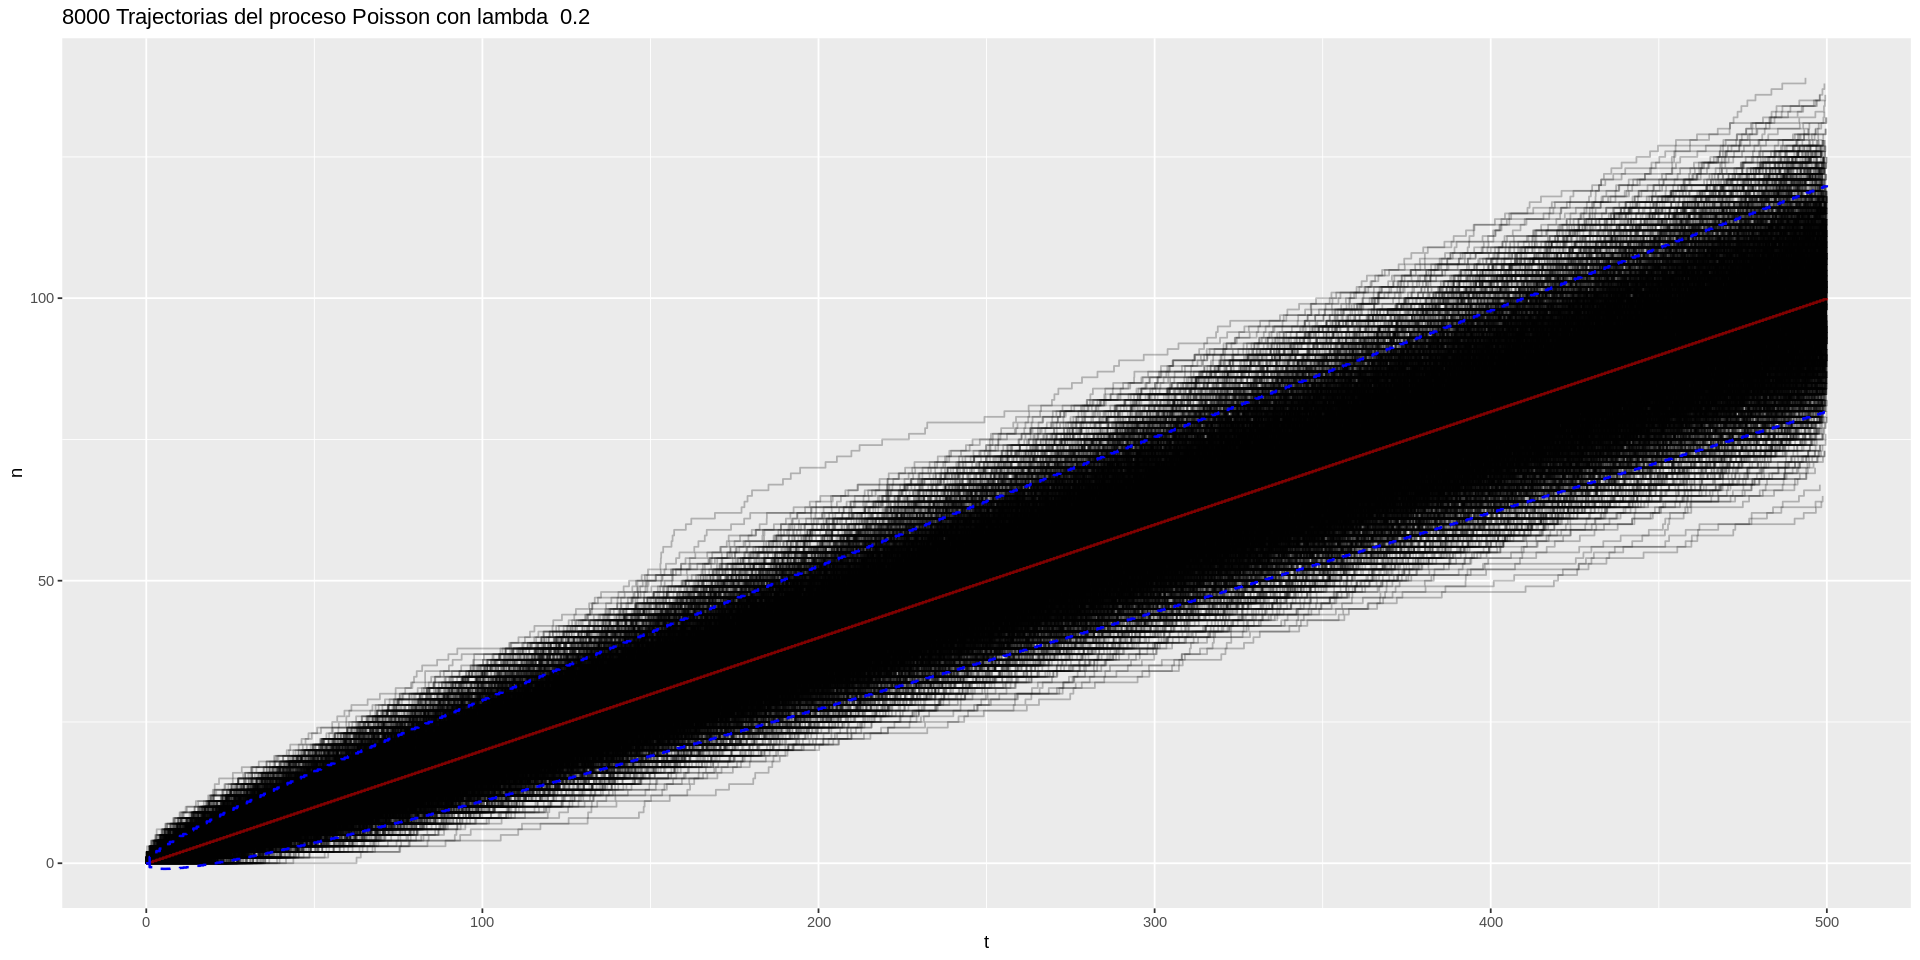

In [26]:
# Gráfico del proceso Poisson
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(sim.PP, mapping=aes(x=t, y=n, color = runs)) + 
  geom_step(sim.PP, mapping=aes(x=t, y=n, group = runs), alpha = 0.25, col='black') + 
  geom_step(moments_pp, mapping=aes(x=t,y=mean),col='red',size=0.7, alpha=0.5) +
  geom_step(moments_pp, mapping=aes(x=t,y=sd_sup),col='blue',size=0.7,linetype = "dashed") +
  geom_step(moments_pp, mapping=aes(x=t,y=sd_inf),col='blue',size=0.7,linetype = "dashed") +
  labs( title = paste(n.runs, "Trajectorias del proceso Poisson con lambda ", lambda)) +
  theme(legend.position = "none") +
  scale_colour_grey(start = 0.2,end = 0.8) +
  coord_cartesian(xlim = c(0, tmax))
p1

El valor esperado de $N(t)$ es

$$E(N(t)) = \lambda t $$
$$Var(N(t)) = \lambda t $$


Para este ejemplo con t=50 y lambda = 0.2:

$$E(N(t)) = 0.2(50) = 10$$
$$Var(N(t)) = 0.2(50) = 10$$




In [27]:
# Verificación mediante simulación para t=50
sim.PP %>% filter(t<=50) %>% group_by(runs) %>% summarise(Nt=max(n)) %>% summarise(mean=mean(Nt), var=var(Nt))

mean,var
<dbl>,<dbl>
10.00025,9.995999


# **Covarianza**

Para un proceso Poisson con parámetro lambda $\lambda$, y $s<t$ la covarianza entre $N(s)$ y $N(t)$ es 

\begin{equation}
Cov(N(s), N(t))  =  \lambda s
\end{equation}

**Ejemplo:**

Obtener:

1.- $Cov(N(5), N(6))$

2.- $Cov(N(100), N(40))$


**Solución teórica:**

1.- $Cov(N(5), N(6))= \lambda s = (0.2)(5)= 1$

2.- $Cov(N(100), N(40))= \lambda s = (0.2)(40)= 8$

In [28]:
# Solución $Cov(N(5), N(6))$

# Obtenemos N(5)
N_5 <- sim.PP %>% filter(t<=5) %>% group_by(runs) %>% summarise(Nt=max(n))%>% select(Nt) %>% pull()
# Obtenemos N(6)
N_6 <- sim.PP %>% filter(t<=6) %>% group_by(runs) %>% summarise(Nt=max(n))%>% select(Nt) %>% pull()

# Calculamos la covarianza muestreal entre N(5) y N(6))
round(cov(N_5, N_6),2)

[1] 0.98

In [29]:
# Solución $Cov(N(100), N(40))$

# Obtenemos N(100)
N_100 <- sim.PP %>% filter(t<=100) %>% group_by(runs) %>% summarise(Nt=max(n))%>% select(Nt) %>% pull()
# Obtenemos N(40)
N_40 <- sim.PP %>% filter(t<=40) %>% group_by(runs) %>% summarise(Nt=max(n))%>% select(Nt) %>% pull()

# Calculamos la covarianza muestreal entre N(100) y N(40))
round(cov(N_100, N_40),2)

[1] 7.91